In [4]:
pip install sklearn-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn-learn (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sklearn-learn


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.read_csv('Titanic-Dataset.csv')
df_clean = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])
df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})
df_clean = pd.get_dummies(df_clean, columns=['Embarked'])
df_clean.head


<bound method NDFrame.head of      Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
0           0       3    0  22.0      1      0   7.2500       False   
1           1       1    1  38.0      1      0  71.2833        True   
2           1       3    1  26.0      0      0   7.9250       False   
3           1       1    1  35.0      1      0  53.1000       False   
4           0       3    0  35.0      0      0   8.0500       False   
..        ...     ...  ...   ...    ...    ...      ...         ...   
886         0       2    0  27.0      0      0  13.0000       False   
887         1       1    1  19.0      0      0  30.0000       False   
888         0       3    1  28.0      1      2  23.4500       False   
889         1       1    0  26.0      0      0  30.0000        True   
890         0       3    0  32.0      0      0   7.7500       False   

     Embarked_Q  Embarked_S  
0         False        True  
1         False       False  
2         False        True

Binary Accuracy: 0.8101

Classification Report:
                 precision    recall  f1-score   support

Did Not Survive       0.83      0.86      0.84       105
       Survived       0.79      0.74      0.76        74

       accuracy                           0.81       179
      macro avg       0.81      0.80      0.80       179
   weighted avg       0.81      0.81      0.81       179



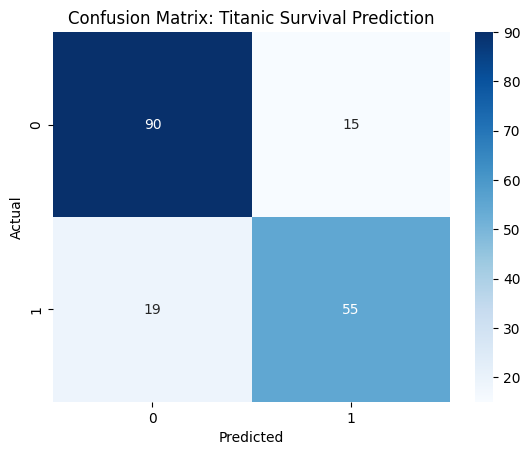

In [10]:
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Binary Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Did Not Survive', 'Survived']))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Titanic Survival Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()